In [1]:
## clustering of labels

import rasterio
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import mapping
import numpy as np

# Load the shapefile
polygons = gpd.read_file(r"D:\omer\poverty_mapping_data\FinalNTL.shp")

# Open the raster file
NTL = np.array([])
for index, row in polygons.iterrows():
    # Append the grid code to NTL 
    print(row['geometry'])
    break
    NTL = np.append(NTL, row['grid_code'])
    # print(labels[index], row['grid_code'])


POLYGON ((74.4119465589077 32.37977441468752, 74.4119465589077 32.38426599108752, 74.4164381353077 32.38426599108752, 74.4164381353077 32.37977441468752, 74.4119465589077 32.37977441468752))


In [4]:
print(NTL.shape)

(2392,)


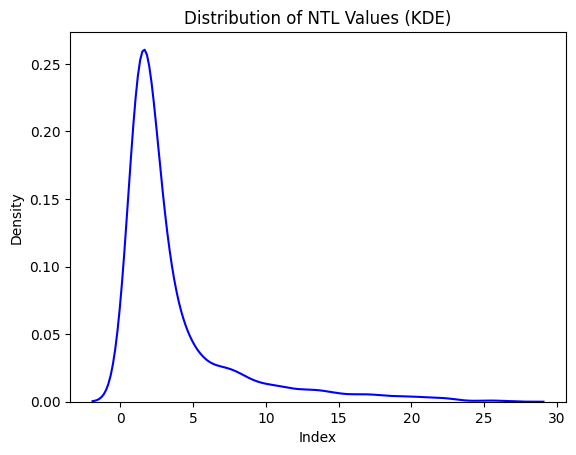

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the values in NTL on a line
# plt.hist(NTL, bins=100, alpha=0.7, color='blue')

# Plot the KDE of NTL values
sns.kdeplot(NTL, color='blue')

plt.xlabel('Index')
plt.ylabel('Density')
plt.title('Distribution of NTL Values (KDE)')

# Show the plot
plt.show()



In [6]:
from sklearn.mixture import GaussianMixture
# Fit a GMM to NTL values
gmm = GaussianMixture(n_components=3)
gmm.fit(NTL.reshape(-1, 1))

# Get the predicted labels for each NTL value
labels = gmm.predict(NTL.reshape(-1, 1))

# Print the GMM parameters
print("GMM Parameters:")
print("---------------")
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)
print("Weights:", gmm.weights_)


GMM Parameters:
---------------
Means: [[11.93543994]
 [ 1.56443616]
 [ 3.96478593]]
Covariances: [[[26.53366905]]

 [[ 0.23577869]]

 [[ 2.92080246]]]
Weights: [0.14237415 0.57490482 0.28272103]


In [7]:
print(labels[0:25])

[1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


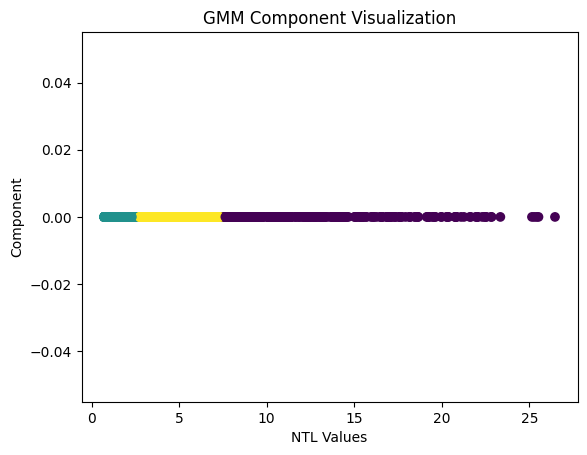

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot of the NTL values with different colors for each component
plt.scatter(NTL, np.zeros_like(NTL), c=labels, cmap='viridis')

# Add labels and title to the plot
plt.xlabel('NTL Values')
plt.ylabel('Component')
plt.title('GMM Component Visualization')

# Show the plot
plt.show()


In [9]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import mapping

# Load the shapefile
polygons = gpd.read_file(r"D:\omer\poverty_mapping_data\FinalNTL.shp")
arr=[]
# Open the raster file
with rasterio.open(r"D:\omer\poverty mapping\data\sialkot_combined\sialkot_zoom_20.tif") as src:
    for index, row in polygons.iterrows():
        # Get the polygon geometry and transform to GeoJSON format
        geom = [mapping(row['geometry'])]
        c = labels[index]
        # Clip the raster with the polygon using rasterio's mask function
        out_image, out_transform = mask(src, geom, crop=True)

        # Get the attribute to use as the name
        name = row['grid_code']
        arr.append([c, name])
        # Update the metadata with the new, clipped raster's details
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform,
        })

        # Save the clipped raster to a new file
        with rasterio.open(f'D:\omer\poverty_mapping_data\clipped_data\{c, name, index}.tif', 'w', **out_meta) as dest:
            dest.write(out_image)

In [15]:
class_counts = {}

for cls, val in arr:
    if cls in class_counts:
        class_counts[cls] += 1
    else:
        class_counts[cls] = 1

class_counts
# arr

{1: 1468, 2: 613, 0: 311}

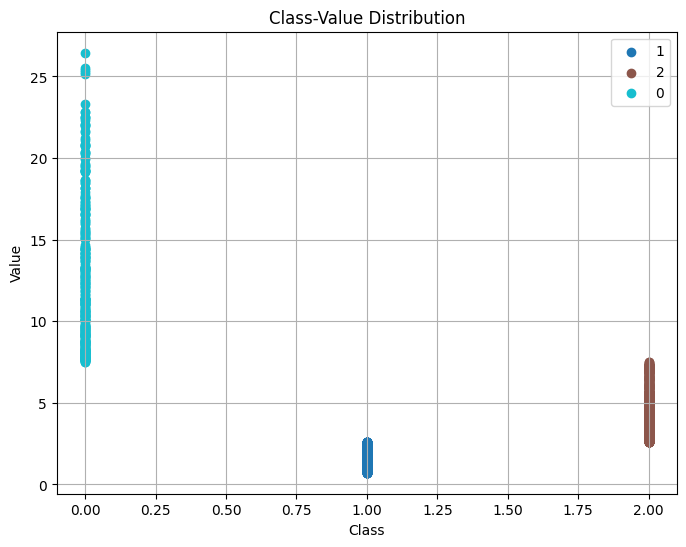

In [11]:
# Reorganizing data by class for plotting
class_dict = {}
for cls, val in arr:
    if cls in class_dict:
        class_dict[cls].append(val)
    else:
        class_dict[cls] = [val]

# Generating plot
plt.figure(figsize=(8, 6))
colors = iter(plt.cm.tab10(np.linspace(0, 1, len(class_dict))))  # Color iterator for classes

for cls, values in class_dict.items():
    plt.scatter([cls]*len(values), values, color=next(colors), label=cls)

plt.title('Class-Value Distribution')
plt.xlabel('Class')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

In [12]:
img_path = r"D:\omer\poverty mapping\clipped4\(20.298, 1379).tif"

from PIL import Image
import random

im = Image.open(img_path)
# Set the crop size
crop_size = 224

# Get the image width and height
width, height = im.size

# Calculate the maximum coordinates for cropping
max_x = width - crop_size
max_y = height - crop_size

# Create a list to store the cropped images
cropped_images = []

# Take random crops
for _ in range(5):
    # Generate random coordinates for cropping
    x = random.randint(0, max_x)
    y = random.randint(0, max_y)

    # Crop the image
    cropped_image = im.crop((x, y, x + crop_size, y + crop_size))

    # Add the cropped image to the list
    cropped_images.append(cropped_image)

# Show the cropped images
for cropped_image in cropped_images:
    cropped_image.show()



(1676, 1675)


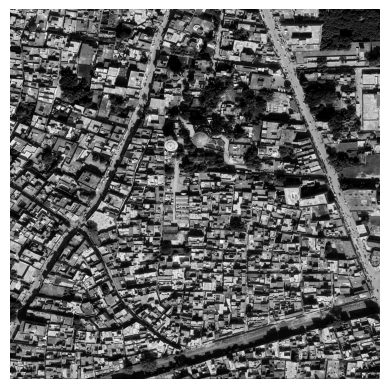

In [7]:
import rasterio
import matplotlib.pyplot as plt

img_path = r"D:\omer\poverty mapping\clipped4\(20.298, 1379).tif"

# Load the image
image = rasterio.open(img_path)
print(image.shape)
# Read the image data
data = image.read(1)

# Display the image
plt.imshow(data, cmap='gray')
plt.axis('off')
plt.show()
